<img src="https://raw.githubusercontent.com/HooshBaaz/2022_DataAnalytics_SummerSchool/main/assets/logo3.png" width="200" height="200" >

<div style="display:block"><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Day5 - HandsOn1: Regression Models</b></font><br>
        <hr/>

</div>

<pre>
.
├── Import Necessary Libraries
│
├── Linear Regression
│
├── Polynomial Regression
│ 
├── Regularization
│
└── (Optional) Bonus Linear regression using batch gradient descent (From scratch)

</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

# Part 0: Import Necessary Libraries

We import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn.

In [393]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [394]:
np.random.seed(42)

# Part1: Linear regression

 ## Dataset

For better understanding of this section, we will create our own dataset.

Create 100 sampled data according to below formula:
$$y = 3x + 4 +\mathcal{N}(0,1), x\in[-2, 2)$$

where $\mathcal{N}(0, 1)$ is normal distribution with mean equals to 0 and variance equals to 1.

#### 💭 Questions
- Create dataset and save them in variables called `X` and `y`.
- Plot the data

In [395]:
#create dataset
import numpy as np
X = np.linspace(-2 , 2 ,100)
y = 3 * X + 4 + np.random.normal(loc=0 , scale=1 , size=100)

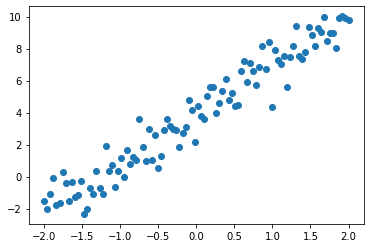

In [396]:
#plot the data
plt.scatter(X,y)

In [397]:
X = X.reshape(-1 ,1 )
y = y.reshape(-1 ,1 )

## Model training

#### 💭 Questions
- Fit a linear regression model
- Plot the regression line

In [398]:
#fit regression model
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

lr = LinearRegression().fit(X,y)

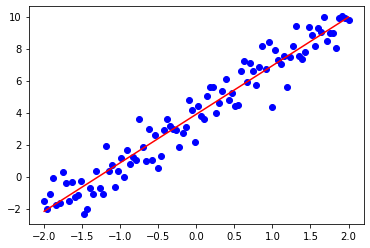

In [399]:
plt.scatter(X, y, color='blue')
plt.plot(X, lr.predict(X), color='red')

# Part2: Polynomial regression

## Dataset

Create 100 sampled data according to below formula:
$$y=0.5x^2+x+2+\mathcal{N}(0, 1), x\in[-3, 3)$$

where $\mathcal{N}(0, 1)$ is normal distribution with mean equals to 0 and variance equals to 1.

#### 💭 Questions
- Create dataset and save them in variables called `X` and `y`.
- Plot the data

In [437]:
X_poly = np.linspace(-3 , 3 , 100)
y_poly = 0.5*np.power(X_poly,2) + X_poly + 2 + np.random.normal(loc=0 , scale=1 , size=100)

X_poly = X_poly.reshape(-1 ,1 )
y_poly = y_poly.reshape(-1 ,1 )

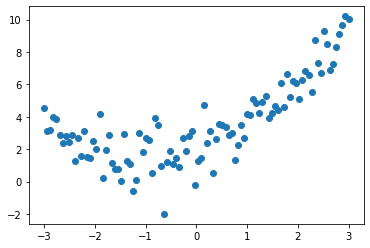

In [438]:
plt.scatter(X_poly,y_poly)

## Model training

#### 💭 Questions
- Fit a polynomial regression model
- Plot the regression line

In [439]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_2 = poly.fit_transform(X_poly)

In [440]:
lr_poly = LinearRegression().fit(X_poly_2,y_poly)

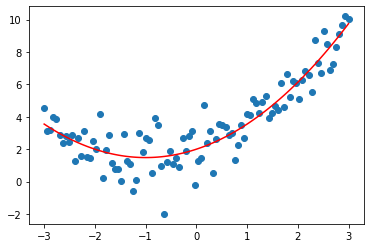

In [441]:

plt.scatter(X_poly,y_poly)
plt.plot(X_poly, lr_poly.predict(X_poly_2), color='red')

## Overfitting and Underfitting

#### 💭 Questions
- Fit polynomial regressions with three different degrees (1, 2, 300)
- Plot the regression line
   - Note: Befor fitting Linear regression, Standardize features by removing the mean and scaling to unit variance.
- which degree is the best for our model?
- which degree leads to model overfitting?

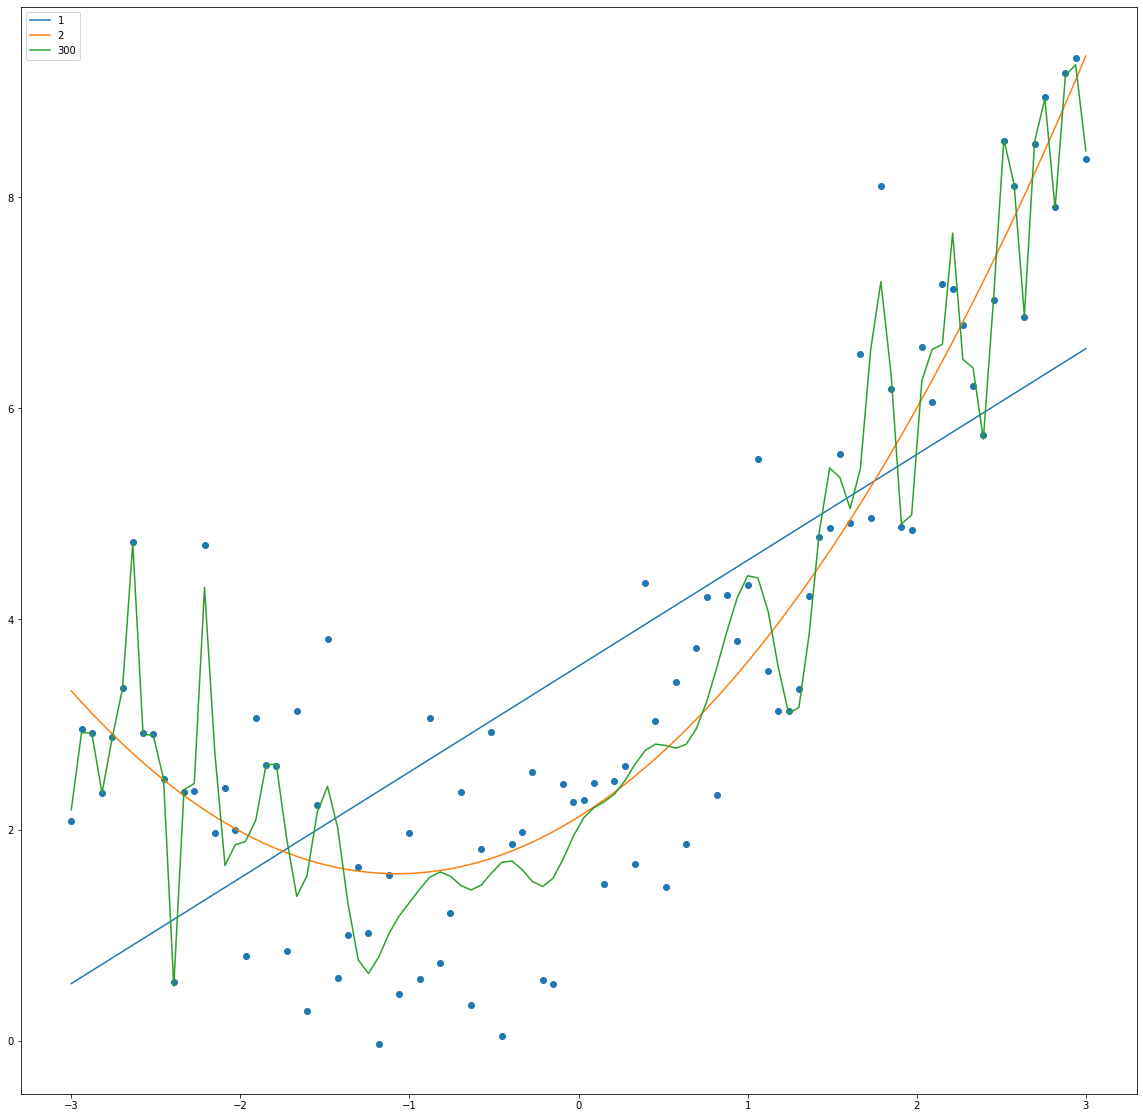

In [405]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(20,20))
plt.scatter(X_poly,y_poly)

for i in [1,2,300]:
    poly_temp = PolynomialFeatures(degree=i)
    
    X_poly_temp = poly_temp.fit_transform(X_poly)
    ss = StandardScaler()
    X_poly_temp = ss.fit_transform(X_poly_temp)
    lr_poly_temp = LinearRegression().fit(X_poly_temp,y_poly)
    plt.plot(X_poly, lr_poly_temp.predict(X_poly_temp) , label = i)
    plt.legend()

## RMSE for different training set size

In this section we want to calculate RMSE for linear regression and polynomial regression on different trainig set sizes.
#### 💭 Questions
- Split data to Train and Test with proportion of 80 to 20.
- For different size of data set (from 1 to size of tarining size) repeat this steps:

  - Fit the model
  - Calculate RMSE
- Plot RMSE for linear regression and polynmaial regression
- What is the best training size for each model?



In [415]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt
lin_rmse = []
poly_rsme = []
X_2 = np.linspace(-3 , 3 , 100)
y_2 = 0.5*np.power(X_2,2) + X_2 + 2 + np.random.normal(loc=0 , scale=1 , size=100)

X_2 = X_2.reshape(-1,1)
y_2 = y_2.reshape(-1,1)

X_train , X_test , y_train , y_test = train_test_split(X_2,y_2 , test_size=0.2)

for i in range(1,X_train.shape[0]):
    X_train_temp = X_train[:i]
    y_train_temp = y_train[:i]
    X_test_temp = X_test[:i]
    y_test_temp = y_test[:i]
    
    lr_lin_temp = LinearRegression().fit(X_train_temp,y_train_temp)
    lr_lin_pred = lr_lin_temp.predict(X_test_temp)
    lin_rmse.append(sqrt(mean_squared_error(y_test_temp,lr_lin_pred , squared=True)))
    
    X_train_temp_i = PolynomialFeatures().fit_transform(X_train_temp)
    X_train_temp_i = StandardScaler().fit_transform(X_train_temp)
    
    lr_poly2_temp = LinearRegression().fit(X_train_temp_i,y_train_temp)
    lr_pred_poly = lr_poly2_temp.predict(X_test_temp)
    poly_rsme.append(sqrt(mean_squared_error(y_test_temp,lr_pred_poly,squared=True)))
    
lin_rmse = np.array(lin_rmse)
poly_rsme = np.array(poly_rsme)

<BarContainer object of 79 artists>

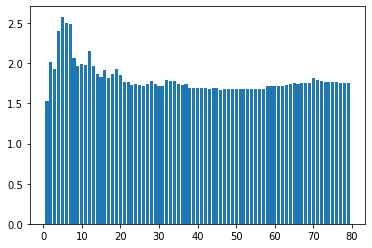

In [409]:
plt.bar(list(range(1,80)),lin_rmse)

<BarContainer object of 79 artists>

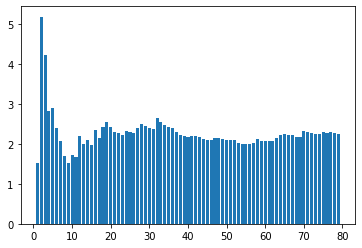

In [410]:
plt.bar(list(range(1,80)),poly_rsme)

## Find the best model

In this section, we are going to find the best model for the given data.
#### 💭 Questions
- Split data to Train and Test with proportion of 80 to 20.
- Set degree=90, include_bias=False for PolynomialFeature()
- For 500 epoch fit sgdRegression using sklearn
- Calculate RMSE for train and validaion
- Find the best number of epochs for traning
- Plot the RMSE for training and validationset and show the best point with an arrow

In [425]:
#dataset
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)


In [430]:
from sklearn.linear_model import SGDRegressor
X_train_2 , X_test_2 , y_train_2 , y_test_2 = train_test_split(X,y,test_size=0.2)
pll = PolynomialFeatures(degree=90 , include_bias=False)
X_poly_reg = pll.fit_transform(X_train_2)
X_test_123 = pll.fit_transform(X_test)
sgd = SGDRegressor(max_iter=500).fit(X_poly_reg,y_train_2)
y_pred_sgd = sgd.predict(X_test_123)

c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [442]:
rmses = []

for i in range(1,500):
    sgd = SGDRegressor(max_iter=i).fit(X_poly_reg,y_train_2)
    y_pred_sgd = sgd.predict(X_test_123)
    rmses.append(mean_squared_error(y_pred_sgd,y_test_2))

c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Ma

best number of epochs = 1


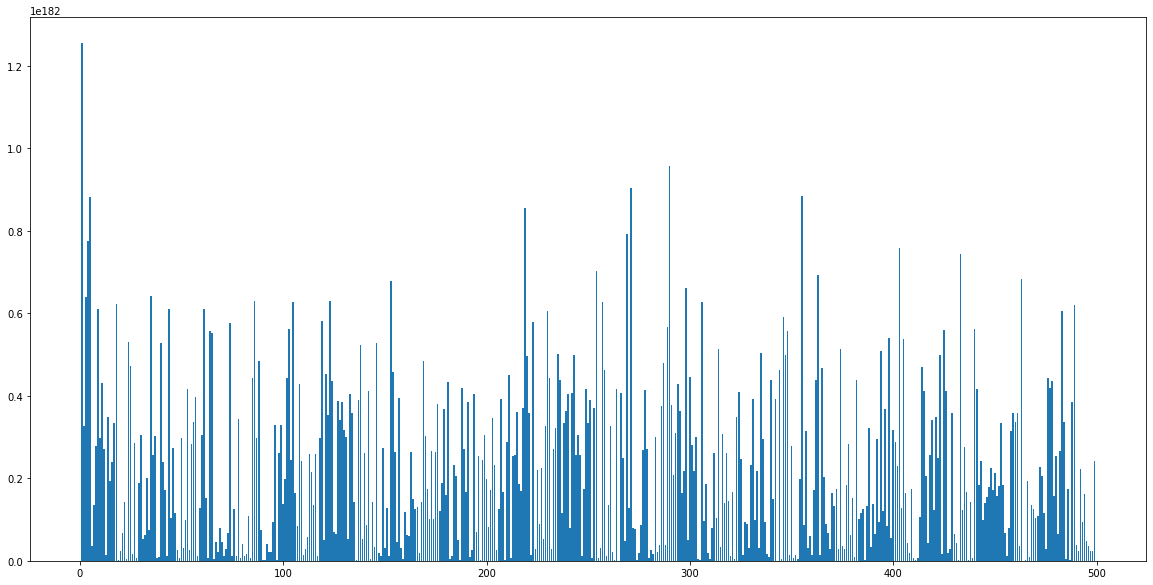

In [450]:
plt.figure(figsize=(20,10))
plt.bar(list(range(1,500)),rmses)
print(f"best number of epochs = {np.argmax(rmses)+1}")

# Part3: Regularization

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.

In this section, we are going to use regularization thechniques such as Lasso and Ridge on the given dataset.

#### 💭 Questions
- For Poynomial model:
  - Use ridge and lasso regularization method with different alphas =(0, 1, 1e-05)
  - Plot the regression line

- For Linear model:
  - Use ridge and lasso regularization method with different alphas =(0, 10, 100)
  - Plot the regression line

- Which regularization thechnique is wirking better? 

In [459]:
from sklearn.linear_model import Ridge, Lasso

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

C:\Users\shadm\AppData\Local\Temp\ipykernel_18704\3569519270.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls = Lasso(alpha=i,max_iter=10000).fit(X,y)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mod

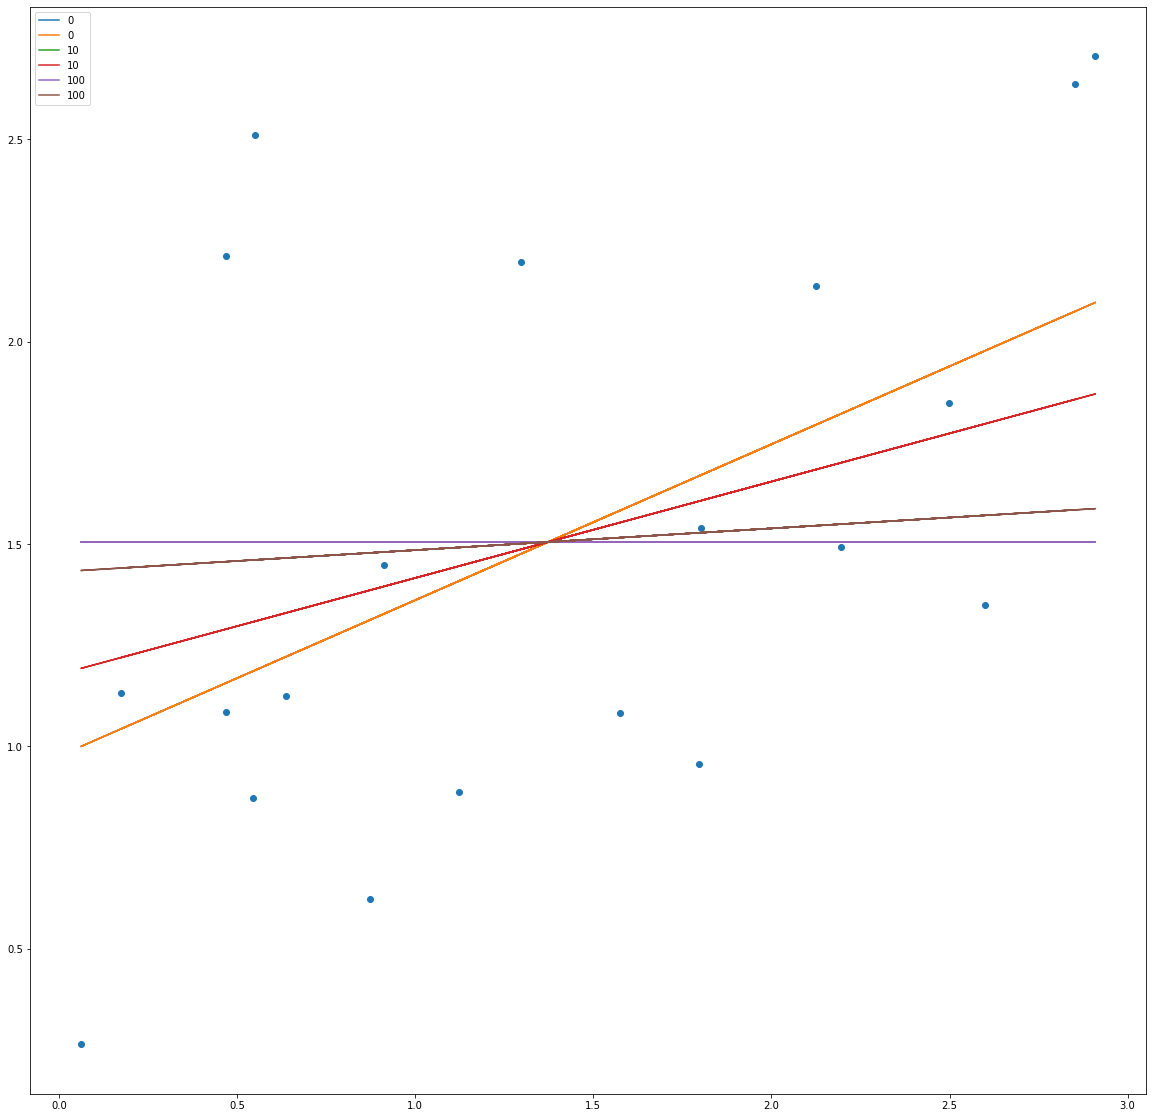

In [470]:
plt.figure(figsize=(20,20))
plt.scatter(X,y)
for i in [0,10,100]:
    ls = Lasso(alpha=i,max_iter=10000).fit(X,y)
    rig = Ridge(alpha=i,max_iter=10000).fit(X,y)
    y_pred_temp_ls = ls.predict(X)
    y_pred_temp_rig = rig.predict(X)
    plt.plot(X,y_pred_temp_ls,label=i)
    plt.plot(X,y_pred_temp_rig,label=i)
    plt.legend()

C:\Users\shadm\AppData\Local\Temp\ipykernel_18704\2732374383.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls2 = Lasso(alpha=i,max_iter=1000000).fit(X_temp,y)
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\shadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.311e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.li

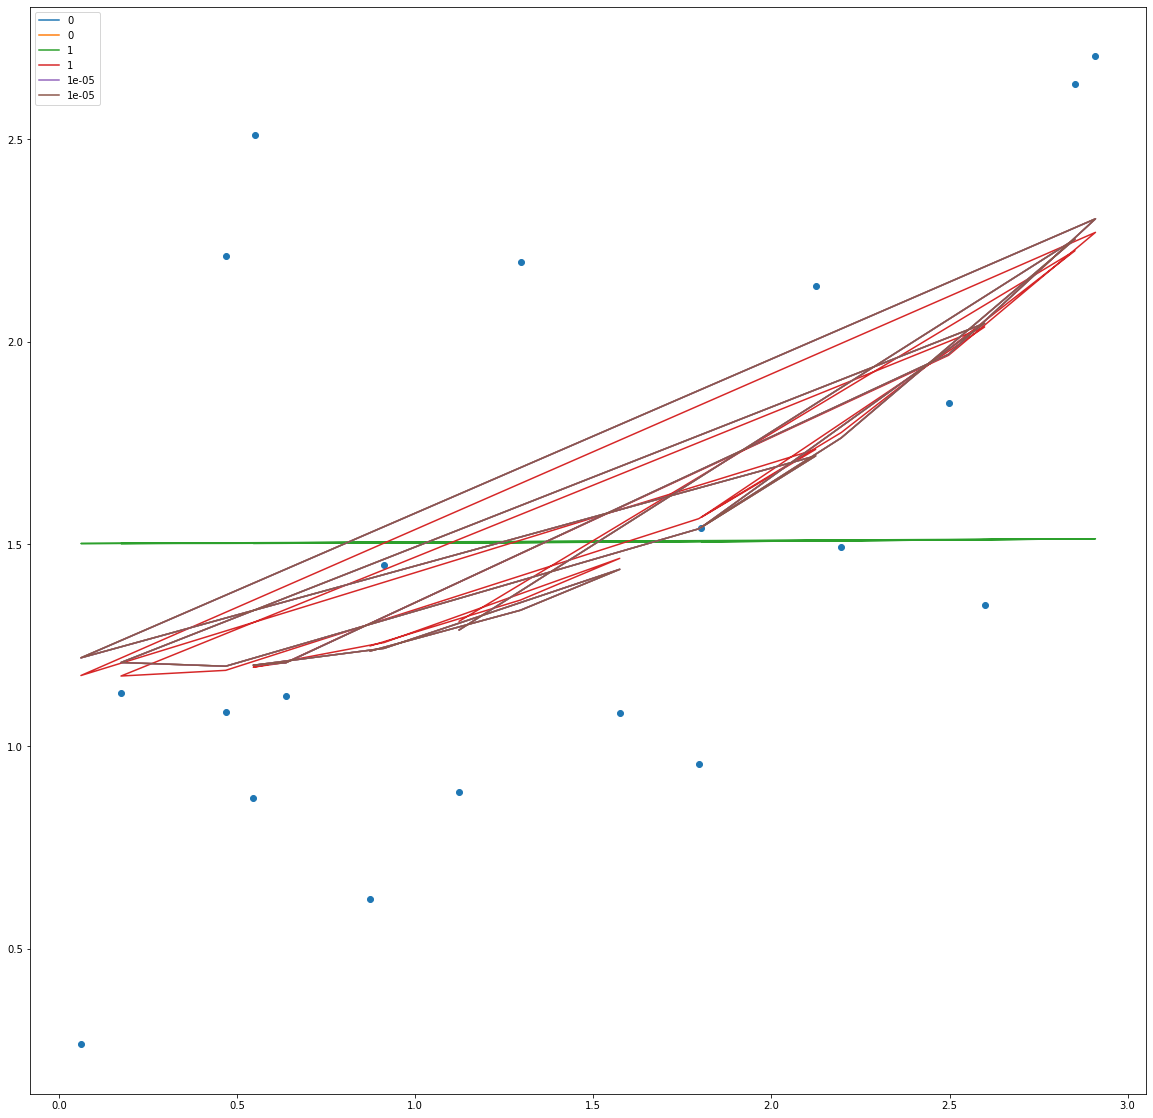

In [490]:
plt.figure(figsize=(20,20))
plt.scatter(X,y)

for i in [0,1,1e-05]:
    X_temp = PolynomialFeatures().fit_transform(X)
    # X_temp = pl1.transform(X)
    rig2 = Ridge(alpha=i,max_iter=1000000).fit(X_temp,y)
    ls2 = Lasso(alpha=i,max_iter=1000000).fit(X_temp,y)
    
    y_pred_ls_2 = ls2.predict(X_temp)
    plt.plot(X,y_pred_ls_2,label=i)
    
    
    y_pred_rig_2 = rig2.predict(X_temp)
    plt.plot(X,y_pred_rig_2,label=i)
    
    plt.legend()
    

# Bonus Linear regression using batch gradient descent (From scratch)

Gradient descent is an optimization algorithm that works by efficiently searching the parameter space, intercept(θ0
) and slope(θ1
) for linear regression, according to the following rule:

$$
  \Theta = \Theta - \alpha \frac{\partial}{\partial \Theta}\ J(\Theta)
$$

Note that we used ':=
' to denote an assign or an update.

The J(θ)
 is known as the cost function and α
 is the learning rate, a free parameter. In this tutorial, we're going to use a least squares cost function defined as following:

$$
  J(\Theta) = \frac{1}{2m}\ sum_{i=1}^{m} (h_{\Theta}(x^{i})- y^{i})^2
$$



#### 💭 Questions
- Create a function to calculate Gradient descent for the given dataset
- Plot linear regression line for three different learning rates(0.02, 0.1, 0.5)

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)